# DA623 - Computing with Signals

## Introduction


- In this notebook, we will compare the performance of PCA, Gram-Schmidt, and DFT by applying and approximating a collection of random gaussian vectors (128 dimensional each).
- We will generate a collection of random gaussian vectors (128 dimensional each) and apply PCA, Gram-Schmidt, and DFT to approximate the vectors.
- We will use the scikit-learn library to perform PCA and the numpy library to perform Gram-Schmidt and DFT.

### Importing necessary libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy.fft import fft


### Generating a dataset of random Gaussian vectors

In [12]:
# Set seed for reproducibility
np.random.seed(42)

num_vectors = 100  # Number of vectors
dim_vectors = 128  # Dimensionality of each vector

# Random Gaussian vectors (mean=0, std=1)
data = np.random.normal(0, 1, (num_vectors, dim_vectors))

# Displaying basic information about the dataset
data.shape

(100, 128)

## Principal Component Analysis (PCA)
PCA is a statistical technique used primarily for reducing the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. This reduction is achieved by identifying directions, called principal components, along which the variation in the data is maximized. PCA is very useful in pattern recognition and predictive modeling because it allows you to simplify complexity in high-dimensional data while retaining trends and patterns.


### Performing PCA

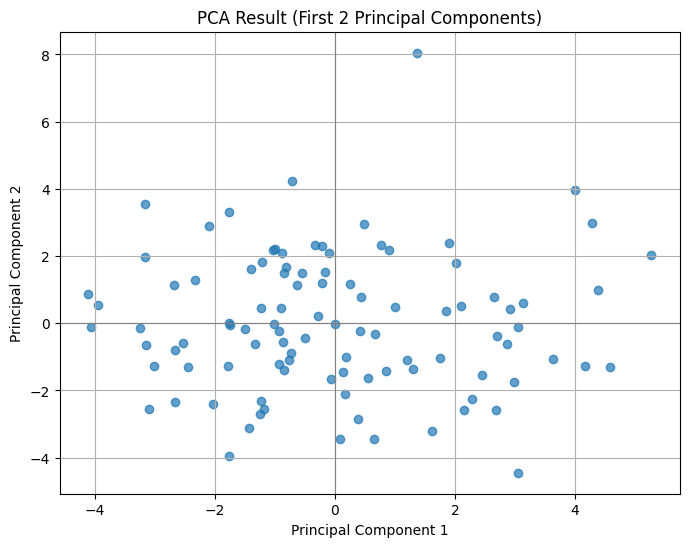

Explained Variance by Principal Components:
Principal Component 1: 3.60% of the variance
Principal Component 2: 3.29% of the variance
Cumulative Explained Variance: 6.89%


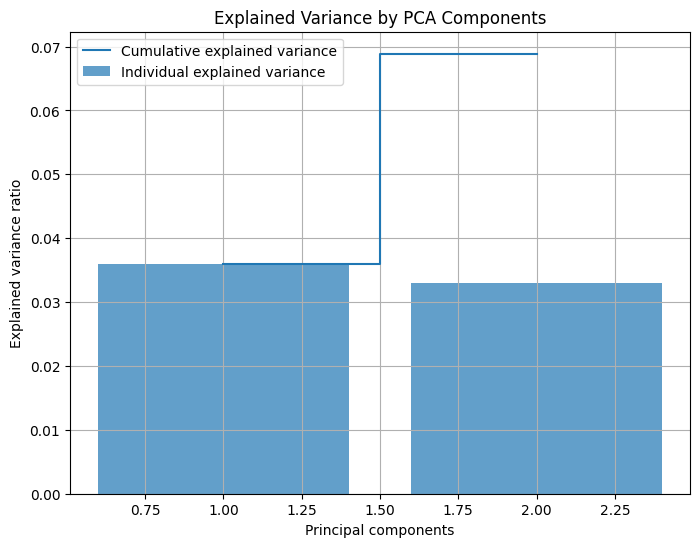

In [13]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for easy visualization
pca_result = pca.fit_transform(data)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA Result (First 2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.show()

# Explaining variance by components
explained_variance = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance)

print("Explained Variance by Principal Components:")
print(f"Principal Component 1: {explained_variance[0]*100:.2f}% of the variance")
print(f"Principal Component 2: {explained_variance[1]*100:.2f}% of the variance")
print(f"Cumulative Explained Variance: {explained_variance_cumsum[-1]*100:.2f}%")

# Plotting explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), explained_variance, alpha=0.7, label='Individual explained variance')
plt.step(range(1, 3), explained_variance_cumsum, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by PCA Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### PCA Results and Interpretation

#### Visualization of PCA Components:
- The scatter plot shows the projection of the original 128-dimensional data onto the first two principal components. This representation helps visualize the underlying structure of the data in two dimensions.
- The spread in the plot indicates variance captured by the first two components.

#### Explained Variance:
- The first principal component explains approximately 3.60% of the variance.
- The second principal component explains about 3.29%.
- Cumulatively, these two components explain roughly 6.89% of the total variance in the dataset.

This relatively low percentage of explained variance by the first two components suggests that the data is quite spread out in many dimensions, typical of high-dimensional Gaussian data where variance is spread nearly equally across all dimensions.

#### Next Steps:
We will proceed with the Gram-Schmidt process to create an orthogonal basis from the same dataset. This will provide a contrast to PCA in terms of how the data dimensions are treated for orthogonality. Let's set up the Gram-Schmidt orthogonalization and apply it to our data.

## Gram-Schmidt Orthogonalization
The Gram-Schmidt process is a method for orthogonalizing a set of vectors in an inner product space, such as Euclidean space, making all vectors orthogonal (perpendicular) to each other. This process is essential in numerical linear algebra for generating orthonormal bases, particularly useful in solving systems of linear equations, QR factorization, and in methods requiring stable numerical accuracy.


### Performing Gram-Schmidt Orthogonalization

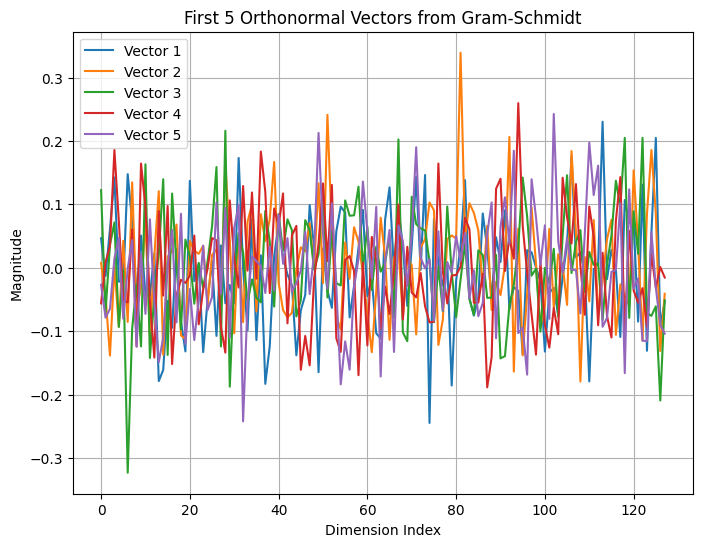

In [14]:
def gram_schmidt(V):
    """
    Perform the Gram-Schmidt process on a set of vectors V.
    Args:
    V (numpy.ndarray): The matrix of vectors (each row represents a vector).
    
    Returns:
    numpy.ndarray: An orthogonal matrix whose rows are an orthogonal basis.
    """
    U = np.zeros_like(V)
    for i in range(len(V)):
        # Start with the original vector
        u = V[i]
        # Subtract the projection of u on the previous vectors
        for j in range(i):
            u -= np.dot(U[j], V[i]) / np.dot(U[j], U[j]) * U[j]
        U[i] = u
    return U

# Applying Gram-Schmidt to the data
orthogonal_basis = gram_schmidt(data)

# Normalizing the orthogonal vectors to make them orthonormal
orthonormal_basis = orthogonal_basis / np.linalg.norm(orthogonal_basis, axis=1, keepdims=True)

# Visualizing the magnitude of the first few vectors after orthogonalization
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(orthonormal_basis[i], label=f'Vector {i+1}')
plt.title('First 5 Orthonormal Vectors from Gram-Schmidt')
plt.xlabel('Dimension Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()


### Gram-Schmidt Orthogonalization Results and Interpretation
#### Visualization of Orthonormal Vectors:
- The plot displays the first five orthonormal vectors obtained from applying the Gram-Schmidt process to our original dataset. Each vector is orthogonal to all others in this set and normalized to have unit length.
- You can observe how each vector varies across the 128 dimensions, illustrating their orthogonality in the high-dimensional space.

#### Interpretation:
- The Gram-Schmidt process successfully transformed the original set of vectors into an orthogonal basis. This basis can be particularly useful for algorithms requiring orthogonal features, such as certain types of regression, classification, or other linear algebra operations where independence of features is crucial.

#### Contrast with PCA:
- Unlike PCA, which focuses on the directions that maximize variance, Gram-Schmidt simply orthogonalizes the vectors in the order they are provided, without consideration of the data’s variance. This makes it suitable for creating a straightforward orthogonal basis but less informative for data compression or feature extraction in terms of variance explained.

#### Next Steps:
Finally, we will apply the Discrete Fourier Transform (DFT) to the same dataset and analyze how frequency components are represented. This will highlight another aspect of data transformation, focusing on frequency rather than variance or orthogonality. Let’s proceed with the DFT.

## Discrete Fourier Transform (DFT)
The Discrete Fourier Transform is a fundamental tool in Fourier analysis that decomposes a sequence of values into components of different frequencies. This transformation is widely used across various fields such as digital signal processing, image analysis, and audio signal processing. DFT converts a signal from its original time or space domain into a representation in the frequency domain, enabling the analysis of the signal's frequency content.


### Applying DFT using FFT

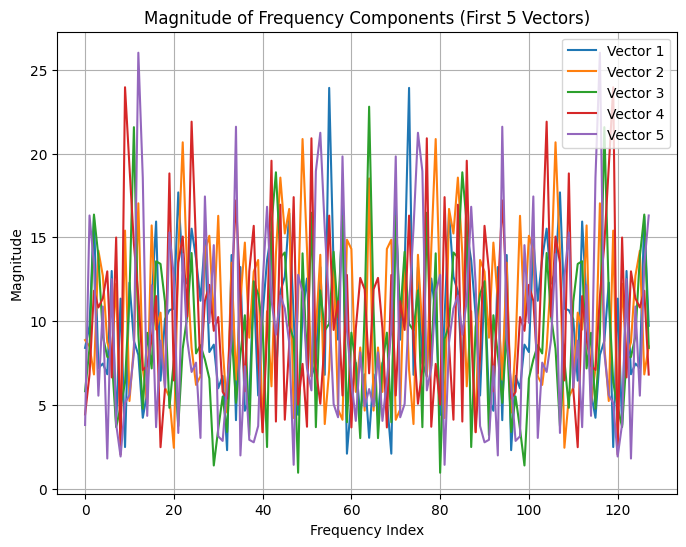

In [11]:

dft_result = fft(data, axis=1)

# Calculating the magnitude of the frequency components
magnitude_dft = np.abs(dft_result)

# Visualizing the magnitude of the frequency components for the first few vectors
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(magnitude_dft[i], label=f'Vector {i+1}')
plt.title('Magnitude of Frequency Components (First 5 Vectors)')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()


### Discrete Fourier Transform (DFT) Results and Interpretation

#### Visualization of Frequency Components:
- The plot shows the magnitude of the frequency components for the first five vectors after applying the Discrete Fourier Transform (DFT). Each line represents the frequency spectrum of a vector, indicating how much of each frequency is present in that vector.
- This visualization helps in understanding the frequency domain representation of the data, which can be crucial for applications in signal processing, filtering, and analysis.

#### Interpretation:
- The significant variations in the magnitude across different frequencies highlight the complex frequency composition of the original data vectors. Higher magnitudes at certain frequencies indicate dominant frequencies within those vectors.

#### Contrast with PCA and Gram-Schmidt:
- DFT transforms data from the time or spatial domain into the frequency domain. Unlike PCA, which reduces dimensionality based on variance, or Gram-Schmidt, which ensures orthogonality, DFT focuses on identifying periodicities and patterns across the dimension treated as time or space.
- This makes DFT particularly useful for analyzing signals or data where periodic patterns are more informative than variance or orthogonality.

## Comparison of PCA, Gram-Schmidt, and DFT

### Similarities
- **Linear Transformations:** All methods apply linear transformations to project data into a new space.
- **Basis Transformation:** Each method involves transforming the basis in which the data is represented, highlighting different attributes of the data (variance, orthogonality, frequency).

### Differences
- **Purpose:** PCA is best for data reduction and feature extraction, Gram-Schmidt for preparing orthogonal bases, and DFT for analyzing signal frequencies.
- **Output Characteristics:** Outputs vary from principal components in PCA, orthogonal vectors in Gram-Schmidt, to frequency spectra in DFT.
- **Mathematical Focus:** From covariance in PCA, projections in Gram-Schmidt, to complex exponentials in DFT.



## Conclusion
In this tutorial, we've explored and applied three different transformations—PCA, Gram-Schmidt orthogonalization, and DFT—on a dataset of random Gaussian vectors:

PCA provided insight into the directions of maximum variance.
Gram-Schmidt process ensured the vectors were orthogonal, useful for many mathematical operations.
DFT revealed the frequency components, essential for signal processing applications.
Each method serves different purposes and is chosen based on the specific needs of the data analysis or processing task. Understanding these differences is key to selecting the right tool for the job in data science and analytics.